# Model Assessment Approaches


## Preparing this Workspace

For this tutorial, please set up a directory on TALC JupyterHub and upload the following files (all available on D2L) into it:

* AssessmentApproaches.ipnyb
* confusion_matrix.png
* diabetes_classification.csv
* diabetes.csv
* iris.csv


## 1. Classification

Classification refers to a problem where a class (or label) is predicted from a fixed number of available classes. The classification task can be either:

* Binary classification - model predicts one of the two classes (i.e. positive/negative)
* Multiclass classification - model predicts from one of more than two classes

### Binary classification

For each binary prediction task, the possible outcome will be from one of the following categories:

* `True Positive (TP)` - correctly predicted positive label
* `True Negative (TN)` - correctly predicted negative label
* `False Positive (FP)` - predicted positive label whereas the true label is negative
* `False Negative (FN)` - predicted negative label whereas the true label is positive

The possible outcomes (model performance with count of correctly idenified / missed prediction) can be viewed in a `confusion matrix`

![Confusion matrix](confusion_matrix.png)

Threre are a few common metrics to assess a binary classifier/model:

* `Accuracy` - proportion of correctly classifying label<br>
<center>$ Accuracy = \frac{TP+TN}{TP + FP + TN + FN} $</center> <br>

* `Precision` - proportion of positive predictions being correct<br>
<center>$ Precision = \frac{TP}{TP + FP} $</center><br>

* `Sensitivity/Recall (True Positive Rate, TPR)` - proportion of positive labels being identified correctly<br>
<center>$ Recall = \frac{TP}{TP + FN} $</center><br>

* `Specificity (True Negative Rate, TNR)` - proportion of negative labels being identified correctly<br>
<center>$ Specificity = \frac{TN}{TN + FP} $</center><br>

* `Balanced Accuracy` - Mean of Sensitivity and Specificity<br>
<center>$ Balanced\,Accuracy = \frac{Sensitivity + Specificity}{2} $</center><br>

* `F1 score` - Harmonic mean of Precision and Sensitivity<br>
<center>$ F_{1} = \frac{2}{Sensitivity^{-1} + Precision^{-1}} $</center><br>

In [1]:
import pandas as pd
import numpy as np

# load categorial diabetes data for classification problem
diab1_df = pd.read_csv('diabetes_classification.csv')

# load continues diabetes data for regression problem
diab2_df = pd.read_csv('diabetes.csv')

# load continues diabetes data for regression problem
iris_df = pd.read_csv('iris.csv')


In [2]:
diab1_df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


We will build a simple `LogisticRegression` model to predict whether someone is `Diabetic` based on other features

In [3]:
from sklearn.linear_model import LogisticRegression

# Diabetes data preparation w/ positions (iloc)
diab1_meta = diab1_df.iloc[:, 0]
diab1_features = diab1_df.iloc[:, 1:9]
diab1_target = diab1_df.iloc[:, 9]

# Set regularization hyperparameter
reg = 0.01

# Initialize the model
logreg = LogisticRegression(n_jobs=-1, C=1/reg, solver="liblinear")

# Fit it to our data
logreg.fit(diab1_features, diab1_target)

# Get default scoring metric (in this case accuracy)
logreg.score(diab1_features, diab1_target)


/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


0.7855

#### Model evaluation

SciKit-Learn has 3 different APIs for evaulating a model:

* `Estimator score method` - Each esmitator includes a `score` method. The default scoring method may vary across estimators
* `Scoring parameter` - model evaluation tools using `cross-validation`. the method for internal scoring strategy can be set separetely
* `Metric functions` - The `sklearn.metrics` module implements common metrics used for classification, regression and clustering tasks


We will generate confusion matrix with `confusion_matrix` method from `sklearn.metrics` and `ConfusionMatrixDisplay` for displaying it. `confusion_matrix` requires two inputs: true label and predicted label. We can use `predict` method from model to get the predicted labels

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# true labels
true_labels = diab1_target.values

# predict labels
predicted_labels = logreg.predict(diab1_features)

# generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

/tmp/ipykernel_16155/2480315712.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()



We will use the true and predicted labels from the above section to calculate other performance metrics such as `Accuracy`, `Precision`, `Recall`, `Balanced Accuracy` and `F1 score`

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score

# calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy:', accuracy)

# calculate precision
precision = precision_score(true_labels, predicted_labels)
print('Precision : ' + str(precision))

# calculate recall
recall = recall_score(true_labels, predicted_labels)
print('Recall : ' + str(recall))

# calculate balanced accuracy score
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
print('Recall : ' + str(balanced_accuracy))

# calculate f1-score
f1 = f1_score(true_labels, predicted_labels)
print('F1 score : ' + str(f1))

Accuracy: 0.7855
Precision : 0.7143367894172328
Recall : 0.597488038277512
Recall : 0.7387229854849098
F1 score : 0.6507083536883244


`Reciever Operating Curve (ROC)` is a graph showing the performance of a model where True Positive Rate (TPR) is plotted against False Positive Rate (FPR). Area Under Curve (AUC) refers to the area under the ROC plot. For a perfect model, we will get `AUC = 1`

We can generate ROC with `RocCurveDisplay.from_estimator`. It requires the model, feature matrix and target (true label) to generate ROC curve calculate AUC

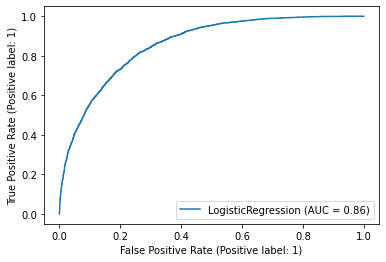

In [6]:
# Make sure plots appear within the notebook correctly
%matplotlib inline

# calculate AUC and plot ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, diab1_features, diab1_target)
plt.show()

Another graph for showing showing the performance of a model is Precision-recall curve where Precision is plotted against Recall. In ideal case, we will get `AUC = 1`

We can generate ROC with `PrecisionRecallDisplay.from_estimator`. It requires the model, feature matrix and target (true label) to generate ROC curve calculate AUC

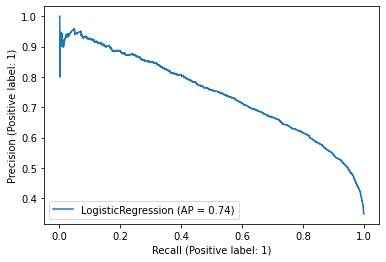

In [7]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(logreg, diab1_features, diab1_target)
plt.show()


### Multiclass classification

In multiclass classification problem, the predicted labels can be more than two. So, the idea of positive/negative labels can't be applied directly. However, we can treat the prediction of each class as a binary classification problem. Then, we can generate all binary classification metrics for each predicted labels. Finally, we can combine results accross all predicted labels into a single metric (i.e. mean).

In [8]:
iris_df

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,3,6.7,3.1,4.7,1.5,1
1,13,5.7,2.8,4.1,1.3,1
2,20,6.1,3.0,4.6,1.4,1
3,24,6.7,3.3,5.7,2.1,2
4,29,5.4,3.0,4.5,1.5,1
...,...,...,...,...,...,...
145,843,4.6,3.4,1.4,0.3,0
146,851,6.4,2.7,5.3,1.9,2
147,857,5.1,3.8,1.9,0.4,0
148,865,5.7,3.8,1.7,0.3,0


we will create a model with `iris` dataset using the same code used above

In [9]:
# Diabetes data preparation w/ positions (iloc)
iris_meta = iris_df.iloc[:, 0]
iris_features = iris_df.iloc[:, 1:5]
iris_target = iris_df.iloc[:, 5]

# Set regularization hyperparameter
reg = 0.01

# Initialize the model
logreg = LogisticRegression(n_jobs=-1, C=1/reg, solver="liblinear")

# Fit it to our data
logreg.fit(iris_features, iris_target)

# Get default scoring metric (in this case accuracy)
logreg.score(iris_features, iris_target)



/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


0.98

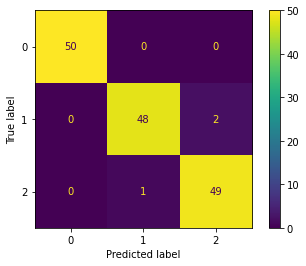

In [10]:
# true labels
true_labels = iris_target.values

# predict labels
predicted_labels = logreg.predict(iris_features)

# generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score

# true labels
true_labels = iris_target.values

# predict labels
predicted_labels = logreg.predict(iris_features)

# calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy:', accuracy)

# calculate precision
precision = precision_score(true_labels, predicted_labels, average = 'weighted')
print('Precision : ' + str(precision))

# calculate recall
recall = recall_score(true_labels, predicted_labels, average = 'weighted')
print('Recall : ' + str(recall))

# calculate balanced accuracy score
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
print('Balanced Accuracy : ' + str(balanced_accuracy))

# calculate f1-score
f1 = f1_score(true_labels, predicted_labels, average = 'weighted')
print('F1 score : ' + str(f1))

Accuracy: 0.98
Precision : 0.980125383486728
Recall : 0.98
Balanced Accuracy : 0.98
F1 score : 0.9799979997999799


There is no default method for plotting ROC curves for multiclass problem. However we can write our own method that can create ROC curve for each label and plot them on the same figure.

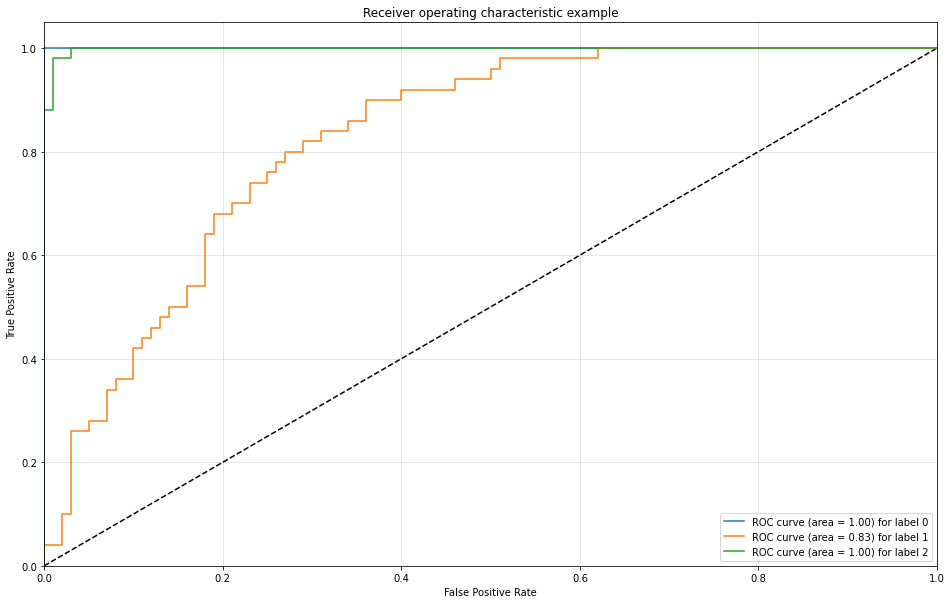

In [12]:
# modified from https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False)    
    labels = y_test_dummies.columns.values
    
    y_test_dummies = y_test_dummies.values
    
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], labels[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

plot_multiclass_roc(logreg, iris_features, iris_target, n_classes=3, figsize=(16, 10))


## 2. Regression

Regression refers to a problem where a continues value is predicted. the The primary metric for a regression model is `Coefficient of Determination` denoted as $ R^2 $ which summarizes the proportion of variation in the model explained by the independent variables.

<center>$ R^2 = \frac{\sum{(predicted - mean\,actual)^2}}{\sum{(actual - mean\,actual)^2}} $</center><br>

Other common error metrics are:

* Mean Absolute Error (MAE)
<center>$ MAE = \frac{1}{N}\sum{|actual - predicted|} $</center><br>

* Mean Squared Error (MSE)
<center>$ MSE = \frac{1}{N}\sum{(actual - predicted)^2} $</center><br>

* Root MSE (RMSE)
<center>$ RMSE = \sqrt{\frac{1}{N}\sum{(actual - predicted)^2}} $</center><br>




In [13]:
diab2_df

,id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response of interest
0,8,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,12,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,21,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,29,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,35,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,2432,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,2433,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,2437,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,2440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


We will build a simple `LinearRegression` model to predict `response of interest` based on other features

In [14]:
from sklearn.linear_model import LinearRegression

# Diabetes data preparation w/ positions (iloc)
diab2_meta = diab2_df.iloc[:, 0]
diab2_features = diab2_df.iloc[:, 1:11]
diab2_target = diab2_df.iloc[:, 11]


# Initialize the model
linreg = LinearRegression(n_jobs=-1)

# Fit it to our data
linreg.fit(diab2_features, diab2_target)
linreg.score(diab2_features, diab2_target)


0.5177494254132934

We will use the true and predicted labels from the above section to calculate other performance metrics such as `R2 score`, `Mean absolute error`, `Mean squared error`, and `Root mean squared error`

In [15]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted_score = linreg.predict(diab2_features)
true_score = diab2_target.values

r2 = r2_score(true_score, predicted_score)
print('R2 score : ' + str(r2))

mae = mean_absolute_error(true_score, predicted_score)
print('Mean absolute error : ' + str(mae))

mse = mean_squared_error(true_score, predicted_score)
print('Mean squared error : ' + str(mse))

rmse = np.sqrt(mse)
print('Root mean squared error : ' + str(rmse))



R2 score : 0.5177494254132934
Mean absolute error : 43.27739508374989
Mean squared error : 2859.6903987680657
Root mean squared error : 53.47607314274362


## 3. Testing

So far we used used all instances from a dataset to train models and generate corresponding performance metrics. Though we may have a model with good performance, it is not possible to know if this model will have similar performance on unseen data. To have a higher confidence, we can split the data into train and test set (or train, test, and validation set). Train set will be used for training the model and test set will only be used for evaluating the performance of the model. 

In [16]:
diab1_df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


### Train/test split

We will use `train_test_split` method from `sklearn.model_selection` to split the data into train/test set. Apart from the feature matrix, and target (or true label), this method takes `test_size` and `random_state` as arguments. `test_size` indicates the proportion of data that will be subset as test data. As the samples are randomly chosen for train/test dataset, `random_state` can be used to ensure the reproduciblity of the split. We can use `stratify` to maintain proportion of different labels while splitting data into train/test set.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Diabetes data preparation w/ positions (iloc)
diab1_meta = diab1_df.iloc[:, 0]
diab1_features = diab1_df.iloc[:, 1:9]
diab1_target = diab1_df.iloc[:, 9]

# X_train and y_train refers to the feature matrix and true label of training dataset
# X_test and y_test refers to the feature matrix and true label of test dataset
X_train, X_test, y_train, y_test = train_test_split(diab1_features, diab1_target, test_size=0.20, random_state=0, stratify=diab1_target)

# Set regularization hyperparameter
reg = 0.01

# Initialize the model
logreg = LogisticRegression(n_jobs=-1, C=1/reg, solver="liblinear")

# Fit it to our training data
logreg.fit(X_train, y_train)

# Get default scoring metric for the test dataset(in this case accuracy)
logreg.score(X_test, y_test)


/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


0.7915

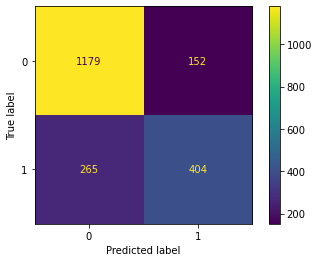

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# true labels
#true_labels = diab1_target.values

# predict labels for the test dataset
# the predicted labels are are refereed as y_hat
y_hat = logreg.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_hat)

# plot confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Accuracy: 0.7915
Precision : 0.7266187050359713
Recall : 0.6038863976083707
Recall : 0.7448432739356654
F1 score : 0.6595918367346939


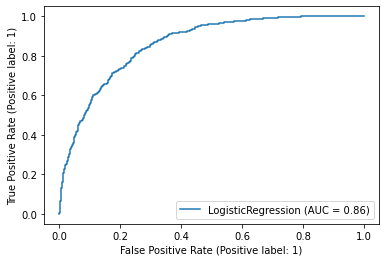

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay

# calculate accuracy
accuracy = accuracy_score(y_test, y_hat)
print('Accuracy:', accuracy)

# calculate precision
precision = precision_score(y_test, y_hat)
print('Precision : ' + str(precision))

# calculate recall
recall = recall_score(y_test, y_hat)
print('Recall : ' + str(recall))

# calculate balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_hat)
print('Recall : ' + str(balanced_accuracy))

# calculate f1-score
f1 = f1_score(y_test, y_hat)
print('F1 score : ' + str(f1))


# Plot ROC
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.show()

We can repeat the split multiple times and check how the models perform

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Diabetes data preparation w/ positions (iloc)
diab1_meta = diab1_df.iloc[:, 0]
diab1_features = diab1_df.iloc[:, 1:9]
diab1_target = diab1_df.iloc[:, 9]

score = []

for i in range(10):
    # X_train and y_train refers to the feature matrix and true label of training dataset
    # X_test and y_test refers to the feature matrix and true label of test dataset
    X_train, X_test, y_train, y_test = train_test_split(diab1_features, diab1_target, test_size=0.20, random_state=i, stratify=diab1_target)

    # Set regularization hyperparameter
    reg = 0.01

    # Initialize the model
    logreg = LogisticRegression(n_jobs=-1, C=1/reg, solver="liblinear")

    # Fit it to our training data
    logreg.fit(X_train, y_train)

    # Get default scoring metric for the test dataset(in this case accuracy)
    score.append(logreg.score(X_test, y_test))

score

/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-pac

[0.7915, 0.786, 0.78, 0.791, 0.79, 0.7815, 0.7785, 0.7835, 0.7865, 0.7885]

### k-fold Cross Validation

In a k fold cross validation approach the dataset is split into `k` smaller subset and then
* A subset is held out for testing
* A model is trained with other `k-1` subsets
* The performance of the model is evaulated using the held out subset
* The training/evaluation is repeated `k` times (by taking each subset as the held out subset once)
* Aggregate performance metrics accross `k` repeatations

We will use `cross_val_score` from `sklearn.model_selection` for a basic k-fold cross validation. By default the method uses `accuracy` as the performance metric while evaluation the performance

In [21]:
# calculate AUC
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(n_jobs=-1, C=1/reg, solver="liblinear")
scores = cross_val_score(logreg, diab1_features, diab1_target, cv=5)
scores


/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-pac

array([0.784 , 0.7885, 0.7775, 0.7815, 0.7915])

we can also explicitly idenfy the scoring metric

In [22]:
scores = cross_val_score(logreg, diab1_features, diab1_target, cv=5, scoring='accuracy')
scores

/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-pac

array([0.784 , 0.7885, 0.7775, 0.7815, 0.7915])

In [23]:
scores = cross_val_score(logreg, diab1_features, diab1_target, cv=5, scoring='recall')
scores

/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-pac

array([0.57634731, 0.58594918, 0.6038864 , 0.61285501, 0.60538117])

## 4. Model Comparision and Fairness

Machine learning models can incorporate unintentional bias, which can lead to issues with fairness. If there is any `sensitive features` that we want to test for bias, we can indicate it While splitting the data into training/test sets.

For the diabetes dataset, we will use the `Age` as a `sensitive feature` to define two categories of patient: 
* those over 50 years old 
* those 50 or younger.

In [24]:
diab1_df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Diabetes data preparation w/ positions (iloc)
diab1_meta = diab1_df.iloc[:, 0]
diab1_features = diab1_df.iloc[:, 1:9]
diab1_target = diab1_df.iloc[:, 9]

# Get sensitive features
S = diab1_features[['Age']].astype(int)

# Change value to represent age groups
S['Age'] = np.where(S.Age > 50, 'Over 50', '50 or younger')

X_train, X_test, y_train, y_test, S_train, S_test = train_test_split(diab1_features, diab1_target, S, test_size=0.20, random_state=0, stratify=diab1_target)


reg = 0.01

# Initialize the model
logreg = LogisticRegression(n_jobs=-1, C=1/reg, solver="liblinear")

# Fit it to our data
logreg.fit(X_train, y_train)


/home/kalumost/anaconda3/envs/MDPR_Course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


LogisticRegression(C=100.0, n_jobs=-1, solver='liblinear')

After training a model, we will use the [Fairlearn](https://fairlearn.org/v0.7.0/quickstart.html) package to compare its behavior for different sensitive feature values. In this case, we will use:
* `selection_rate`: return the selection rate (percentage of positive predictions) for the overall population.
* `MetricFrame`: calculate different performance mertic for across selected sensetive features. 


In [26]:
from fairlearn.metrics import selection_rate, MetricFrame
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Get predictions for the witheld test data
y_hat = logreg.predict(X_test)

# Get overall metrics
print("Overall Metrics:")
# Get selection rate from fairlearn
overall_selection_rate = selection_rate(y_test, y_hat) # Get selection rate from fairlearn
print("\tSelection Rate:", overall_selection_rate)
# Get standard metrics from scikit-learn
overall_accuracy = accuracy_score(y_test, y_hat)
print("\tAccuracy:", overall_accuracy)
overall_recall = recall_score(y_test, y_hat)
print("\tRecall:", overall_recall)
overall_precision = precision_score(y_test, y_hat)
print("\tPrecision:", overall_precision)

# Get metrics by sensitive group from fairlearn
print('\nMetrics by Group:')
metrics = {'selection_rate': selection_rate,
           'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score}

group_metrics = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_hat,
                             sensitive_features=S_test['Age'])

print(group_metrics.by_group)

Overall Metrics:
	Selection Rate: 0.278
	Accuracy: 0.7915
	Recall: 0.6038863976083707
	Precision: 0.7266187050359713

Metrics by Group:
              selection_rate  accuracy    recall precision
Age                                                       
50 or younger       0.217559  0.796797  0.524074  0.718274
Over 50             0.857143  0.740741  0.937984  0.746914


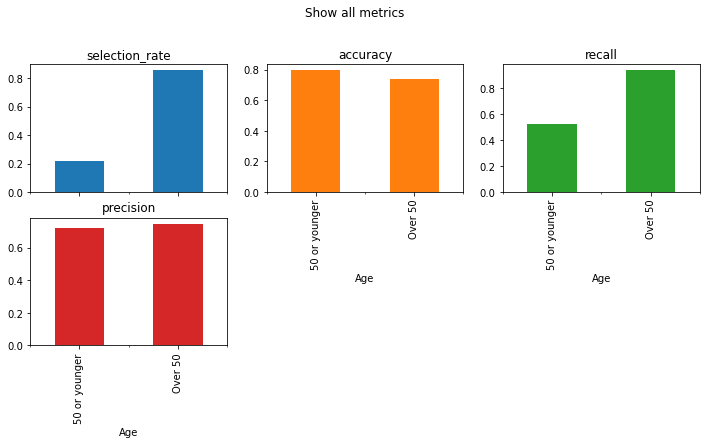

In [27]:
metric_frame = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_hat,
                             sensitive_features=S_test['Age'])
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

plt.show()